In [1]:
import pandas as pd

df = pd.read_csv('classification.csv')
df.head()

,true,pred
0,1,0
1,1,1
2,1,1
3,0,0
4,1,1


In [16]:
from sklearn.metrics import confusion_matrix

conf_marix = confusion_matrix(df.true, df.pred)
# true negatives is C_{0,0}
# false negatives is C_{1,0}
# true positives is C_{1,1}
# false positives is C_{0,1}
tp = conf_marix[1][1]
fp = conf_marix[0][1]
fn = conf_marix[1][0]
tn = conf_marix[0][0]

res = str(tp) + ' ' + str(fp) + ' ' + str(fn) + ' ' + str(tn)

conf_marix
res

'43 34 59 64'

In [15]:
with open('q1.txt', 'w') as f:
    f.write(res)
f.close()

In [76]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Accuracy (доля верно угаданных)-------------> (tp+tn)/(tp+tn+fp+fn)
accuracy = accuracy_score(df.true.as_matrix(), df.pred.as_matrix())

#Precision (точность) -------------> tp/(tp+fp)
precision = precision_score(df.true.as_matrix(), df.pred.as_matrix())

#Recall (полнота) ------------->  tp/(tp+fn)
recall = recall_score(df.true.as_matrix(), df.pred.as_matrix())

#F-мера  -------------> 2*(precision*recall)/(precision+recall)
f1 = f1_score(df.true.as_matrix(), df.pred.as_matrix())

'accuracy = {0}, precision = {1}, recall = {2}, f1 = {3}'.format(accuracy, precision, recall, f1)

0.535


'accuracy = 0.535, precision = 0.558441558442, recall = 0.421568627451, f1 = 0.480446927374'

In [81]:
res = str(accuracy) + ' ' + str(precision) + ' ' + str(recall) + ' ' + str(f1)
with open('q2.txt', 'w') as f:
    f.write(res)
f.close()

In [85]:
df_score = pd.read_csv('scores.csv')
df_score.head()

,true,score_logreg,score_svm,score_knn,score_tree
0,0,0.683832,0.145976,0.787063,0.500000
1,1,0.801966,0.239511,1.000000,0.833333
2,0,0.382315,-0.245701,0.000000,0.000000
3,1,0.506797,-0.137058,0.000000,0.105263
4,1,0.488781,-0.154148,0.000000,0.105263


In [124]:
from sklearn.metrics import roc_auc_score, roc_curve

# roc_auc_score  -  Compute Area Under the Curve (AUC) from prediction scores

roc_logreg = roc_auc_score(df_score.true.as_matrix(), df_score.score_logreg.as_matrix())
roc_svm = roc_auc_score(df_score.true.as_matrix(), df_score.score_svm.as_matrix()) 
roc_knn = roc_auc_score(df_score.true.as_matrix(), df_score.score_knn.as_matrix())
roc_tree = roc_auc_score(df_score.true.as_matrix(), df_score.score_tree.as_matrix()) 

'roc_logreg = {0}, roc_svm = {1}, roc_knn = {2}, roc_tree = {3}'.format(roc_logreg, roc_svm, roc_knn, roc_tree)

'roc_logreg = 0.71918767507, roc_svm = 0.708683473389, roc_knn = 0.635154061625, roc_tree = 0.691926770708'

In [125]:
res = 'score_logreg'
with open('q3.txt', 'w') as f:
    f.write(res)
f.close()

In [122]:
fpr_logreg, tpr_logreg, _ = roc_curve(df_score.true.as_matrix(), df_score.score_logreg.as_matrix(), pos_label=1)
fpr_svm, tpr_svm, _ = roc_curve(df_score.true.as_matrix(), df_score.score_svm.as_matrix()) 
fpr_knn, tpr_knn, _  = roc_curve(df_score.true.as_matrix(), df_score.score_knn.as_matrix())
fpr_tree, tpr_tree, _ = roc_curve(df_score.true.as_matrix(), df_score.score_tree.as_matrix()) 

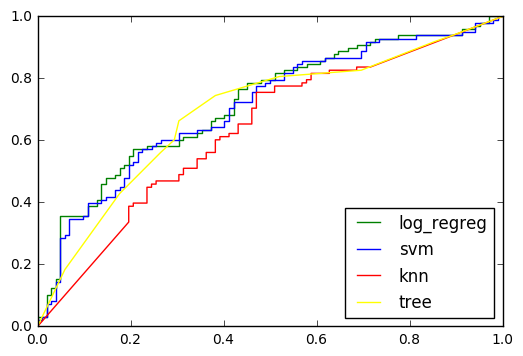

In [132]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure
plt.plot(fpr_logreg, tpr_logreg, color='green', label='log_regreg')
plt.plot(fpr_svm, tpr_svm, color='blue', label='svm')
plt.plot(fpr_knn, tpr_knn, color='red', label='knn')
plt.plot(fpr_tree, tpr_tree, color='yellow', label='tree')
plt.legend(loc='lower right')
plt.show()


In [181]:
#  which classifier has max precision, when recall >= 70%

from sklearn.metrics import precision_recall_curve

def max_precision(recall, precision):                                                                
    res = []
    for i,recall in enumerate(recall):
        if recall >= 0.7:
            res.append(precision[i])
    return max(res)
      

logreg_precision, logreg_recall, logreg_thresthold = precision_recall_curve(df_score.true.as_matrix(), 
                                                                            df_score.score_logreg.as_matrix(),
                                                                            pos_label=1)
logreg_max_pr = max_precision(logreg_recall, logreg_precision)
print 'logreg_max_pr = ', logreg_max_pr


svm_precision, svm_recall, svm_thresthold = precision_recall_curve(df_score.true.as_matrix(), 
                                                                            df_score.score_svm.as_matrix(), 
                                                                            pos_label=1)
svm_max_pr = max_precision(svm_recall, svm_precision)
print 'svm_max_pr = ', svm_max_pr


knn_precision, knn_recall, knn_thresthold = precision_recall_curve(df_score.true.as_matrix(), 
                                                                            df_score.score_knn.as_matrix(), 
                                                                            pos_label=1)
knn_max_pr = max_precision(knn_recall, knn_precision)
print 'knn_max_pr = ', knn_max_pr


tree_precision, tree_recall, tree_thresthold = precision_recall_curve(df_score.true.as_matrix(), 
                                                                            df_score.score_tree.as_matrix(), 
                                                                            pos_label=1)

tree_max_pr = max_precision(tree_recall, tree_precision)
print 'tree_max_pr = ', tree_max_pr

logreg_max_pr =  0.63025210084
svm_max_pr =  0.622807017544
knn_max_pr =  0.606557377049
tree_max_pr =  0.651785714286


In [184]:
res = 'score_tree'
with open('q4.txt', 'w') as f:
    f.write(res)
f.close()